# Definition du modele
  
Nous nous plaçons dans un modèle *fixed design homoscedastic*. En effet, l'hétérogénéité de nos variables explicatives (les /GNP/) est constante sur le temps. En d'autres termes, les GNP ne vont pas changer dans les prochains mois, ou de façon insignifiante. De plus, les variables aleatoires de bruits $\epsilon_i$ sont toutes distribuees aleatoirement:

$Y = X\Theta + \epsilon$

tel que $X$ contient le vecteur $1_n$ comme première colonne et $\epsilon$ une variable aleatoire *i.i.d*:

$E[\epsilon_i] = 0$

$Var[\epsilon_i] = \sigma^2I_n$

The $\hat{\theta}$ estimator for our model can be shown to be:

$\hat{\theta} = (X^TX)^{-1}X^TY$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats
from numpy.linalg import inv

def import_data():
    df = pd.read_csv('invest.txt', delimiter=" ")
    return df

df = import_data()
display(df)

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718.0,257.9,132.34,5.50
9,1977,1918.3,324.1,140.05,5.46


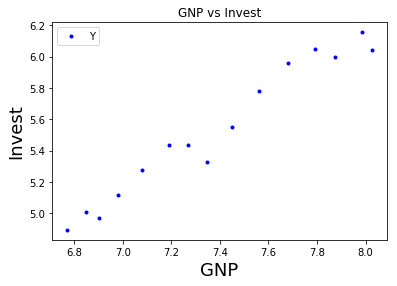

0     6.772394
1     6.850126
2     6.900429
3     6.982492
4     7.078257
5     7.190224
6     7.268362
7     7.345494
8     7.448916
9     7.559195
10    7.679667
11    7.790613
12    7.875917
13    7.985382
14    8.025353
Name: gnp, dtype: float64


In [2]:
def log_scale(vect):
    return np.log(vect)

def normalize_df(data):
    data["gnp"] = log_scale(data["gnp"])
    data["invest"] = log_scale(data["invest"])

def plot_gnp_vs_invest(data):
    gnp = data["gnp"]
    invest = data["invest"]
    plt.figure()
    plt.plot(gnp, invest, color='blue', label='Y', marker='.', linestyle = 'None')
    plt.ylabel('Invest', fontsize=18)
    plt.xlabel('GNP', fontsize=18)
    plt.title("GNP vs Invest")
    plt.legend()
    plt.show()

normalize_df(df)
plot_gnp_vs_invest(df)
print(df["gnp"])

In [3]:
def get_theta_hat(X, Y):
    G = inv(X.T@X)
    theta_hat = G@X.T@Y
    
    return theta_hat

X_tild = df["gnp"]
X = [[1, X_tild[i]] for i in range(0, len(X_tild))]
X = np.matrix(X)
Y = df["invest"]
Y = np.matrix(Y).T
theta_hat = get_theta_hat(X, Y)
print("Theta_hat:", theta_hat.T)


Theta_hat: [[-1.96359134  1.0152814 ]]


Puisque nous avons $rank(X) < p$, un estimateur sans biais de la variance du bruit peut etre definit comme:

$\hat{\sigma}^2 = \frac{||y - X\hat{\theta}||^2}{n - rank(X)}$

Ce qui permet de calculer la matrice de covariance de nos estimateurs:

$Cov(\hat{\theta}) = (X^TX)^{-1}\hat{\sigma}^2$

Et donc leur variances:

$\hat{\sigma}_{\hat{\theta}_0} = \sqrt{Cov(\hat{\theta})_{00}}$

$\hat{\sigma}_{\hat{\theta}_1} = \sqrt{Cov(\hat{\theta})_{11}}$


Le coefficient de determination est le ratio de la variance *expliquée* et la variance *totale*, peut etre calculée de la maniere suivante:

$R^2 = \frac{\sum_{i=1}^n{(\hat{Y}_i - \bar{Y})^2}}{\sum_{i=1}^n{(Y_i - \bar{Y})^2}}$

In [4]:
def get_Y_bar(Y):
    return sum(Y) / len(Y)

def get_Y_hat(X, theta_hat):
    return X@theta_hat

def get_R2(Y):
    Y_bar = get_Y_bar(Y)
    Y_hat = get_Y_hat(X, theta_hat)
    SS_tot = sum([(Y[i] - Y_bar)**2 for i in range(0, len(Y))])
    SS_reg = sum([(Y_hat[i] - Y_bar)**2 for i in range(0, len(Y))])
    return SS_reg / SS_tot

R2 = get_R2(Y)
print("R2:", R2)

def get_sig2(X, Y):
    theta_hat = get_theta_hat(X, Y)
    Y_hat = get_Y_hat(X, theta_hat)
    return sum([(Y_hat[i] - Y[i])**2 for i in range(0, len(Y))]) / (len(Y) - 2)

def get_estimator_covariance_mat(X, Y):
    sig2 = get_sig2(X, Y).item()
    return sig2 * inv(X.T@X)

# unbiased estimator when X is full rank with rank(X) < n which is the case here (rank(X) = 2 and n = len(Y)
print(X.T@X)
print(get_sig2(X, Y)[0, 0])
sigHat_theta1Hat = get_sig2(X, Y)[0, 0] * inv(X.T@X)
var_thetaHat0 = math.sqrt(sigHat_theta1Hat[0, 0])
var_thetaHat1 = math.sqrt(sigHat_theta1Hat[1, 1])
print("Var(thetaHat0):", var_thetaHat0)
print("Var(thetaHat1):", var_thetaHat1)


R2: [[0.9627573]]
[[ 15.         110.75282116]
 [110.75282116 820.24847688]]
0.007676338555460441
Var(thetaHat0): 0.4095472716623457
Var(thetaHat1): 0.05538306035485789


# Question 4

Nous allons maintenant realiser un test de Student sur nos estimateurs pour tester leur nullité. Nos hypothèses nulles sont  donc:

$H_0: \theta^*_j = 0$, ce qui revient a prendre $\Theta_0 = \{\theta \in \mathbb{R}^p: \theta_j = 0\}$

Le test de Student consiste à rejeter $H_0$ au niveau $\alpha$ si $|T_j| > t_{1-\alpha/2}$ pour:

$T_j := \frac{\hat{\theta}_j - \theta^*_j}{\hat{\sigma}\sqrt{({X^TX)^{-1}_{jj}}}} \sim \mathcal{T}_{n - rank(X)}$

$t_{1-\alpha/2}$ un quantile d'ordre $1 - \alpha / 2$ de la loi de Student de degré $n - rank(X)$, $\mathcal{T}_{n - rank(X)}$

Et $\theta^*_j$ nulle par hypothèse. Le test de Student est donc la division de notre estimateur par l'estimation de sa variance.

Les **p-valeurs** sont les plus petits $\alpha$ tel que $0 \in IC_\alpha$.

In [5]:
def rank(X):
    return np.linalg.matrix_rank(X)

def get_theta_hat(X, Y):
    theta_hat = inv(X.T@X)@X.T@Y
    
    return theta_hat

def student_test_i(X, Y, i):
    theta_hat = get_theta_hat(X, Y)
    var_thetaHat = get_estimator_covariance_mat(X, Y)
    return theta_hat[i] / math.sqrt(var_thetaHat[i,i])

def student_test(X, Y):
    return [student_test_i(X, Y, i) for i in range(0, rank(X))]

T = student_test(X, Y) # theta_hat[0] / var_thetaHat0
print("T0:", T[0])
print("T1:", T[1])

n = len(Y)
#t = scipy.stats.t(df=(len(Y) - rankX)).ppf((1 - alpha / 2))

def get_students_quantile(deg, level):
    return scipy.stats.t(df=deg).ppf(level)

from scipy import stats
alpha1 = .00000000008
t1 = get_students_quantile(n - rank(X), 1 - alpha1 / 2)
print("alpha1:", alpha1)
print("t_{1-alpha1/2}:", t1, " > ", abs(T[1]))
print("%:", (1 - alpha1 / 2) * 100)

alpha0 = 0.00000979
t0 = get_students_quantile(n - rank(X), 1 - alpha0 / 2)
print("alpha0:", alpha0)
print("t_{1-alpha0/2}:", t0, " > ", abs(T[0]))
print("%:", (1 - alpha1 / 2)*100)

T0: [[-4.79454137]]
T1: [[18.33198446]]
alpha1: 8e-11
t_{1-alpha1/2}: 18.851491095901718  >  [[18.33198446]]
%: 99.999999996
alpha0: 9.79e-06
t_{1-alpha0/2}: 6.968608818638874  >  [[4.79454137]]
%: 99.999999996


Nos pouvons donc rejeter nos $H_0$, c'est à dire la nullité de nos coéfficients, à plus de 99.999%.


# Question 5

## Interval de confiance de notre resultat

Dans le modèle Gaussien, nous trouvons l'intervale de confiance de niveau $1 - \alpha$ suivant (pour $X^TX$ inversible):

$IC_\alpha(x) := \left[
x^T\hat{\theta} - t_{1-\alpha/2} \hat{\sigma} \sqrt{x^T(X^TX)^{-1}x},
x^T\hat{\theta}_j + t_{1-\alpha/2} \hat{\sigma} \sqrt{x^T(X^TX)^{-1}x},
\right]$

Où, avec une probabilité égale à $1 - \alpha$, $y^* \in CI(x)$ pour $y^* = x^T\theta^*$ et $x = (1, x_1, ..., x_p) \in \mathbb{R}^p$. Ici, nous sommes evidemment dans le cas où $x = (1, x_1) = (1, \log_e 1000)$.

In [6]:
def get_ypred(x, X, Y):
    theta_hat = get_theta_hat(X, Y)
    return (x.T@theta_hat)[0, 0]

def get_IC_ystar(x, X, Y, alpha):
    n = len(Y)
    t = get_students_quantile(n - rank(X), 1 - alpha / 2)
    theta_hat = get_theta_hat(X, Y)
    delta = t * math.sqrt(get_sig2(X, Y) * x.T@inv(X.T@X)@x)
    IC_low_pred = x.T@theta_hat - delta
    IC_high_pred = x.T@theta_hat + delta
    return [IC_low_pred[0, 0], IC_high_pred[0, 0]]

alpha = 0.1
x = np.matrix([[1, np.log(1000)]]).T
ypred = get_ypred(x, X, Y)
IC_ystar = get_IC_ystar(x, X, Y, alpha)
print("pred:", ypred)
print("IC_pred @ alpha = ", alpha, ":", IC_ystar)

pred: 5.049724126316767
IC_pred @ alpha =  0.1 : [4.988222845971073, 5.111225406662461]


### intervale de prédiction

Il est aussi possible de construire un intervale non plus autour de $y^*$ mais de $y$. En effet, nous avons $y = y^* + \epsilon$ avec $\epsilon \sim \mathcal{N}(0, \sigma^2)$, donc:

$IP_\alpha(x) := \left[
x^T\hat{\theta} - t_{1-\alpha/2} \hat{\sigma} \sqrt{1 + x^T(X^TX)^{-1}_{jj}x},
x^T\hat{\theta}_j + t_{1-\alpha/2} \hat{\sigma} \sqrt{1 + x^T(X^TX)^{-1}_{jj}x},
\right]$

Pour $y \in IP(x)$.

In [7]:
def get_IP_y(x, X, Y, alpha):
    n = len(Y)
    t = get_students_quantile(n - rank(X), 1 - alpha / 2)
    theta_hat = get_theta_hat(X, Y)
    delta = t * math.sqrt(get_sig2(X, Y) * (1 + x.T@inv(X.T@X)@x))
    IP_low_pred = x.T@theta_hat - delta
    IP_high_pred = x.T@theta_hat + delta
    return [IP_low_pred[0, 0], IP_high_pred[0, 0]]

IP_y = get_IP_y(x, X, Y, alpha)
print("IP_pred @ alpha = ", alpha, ":", IP_y)

IP_pred @ alpha =  0.1 : [4.8828200234386445, 5.21662822919489]


### Interval de confiance de l'éstimateur (hors TP)

Un interval de confiance de niveau $\alpha$ de nos estimateurs pour le modèle gaussien peut etre définie par:

$IC_\alpha(\hat{\theta}_j) := \left[
\hat{\theta}_j - t_{1-\alpha/2} \hat{\sigma} \sqrt{(X^TX)^{-1}_{jj}},
\hat{\theta}_j + t_{1-\alpha/2} \hat{\sigma} \sqrt{(X^TX)^{-1}_{jj}},
\right]$

In [8]:
# return [[IC_theta0, ..., IC_theta_rank(X)]]
# with IC_theta_p = [IC_low, IC_up]
def get_IC_thetahat(X, Y, alpha):
    n = len(Y)
    t = get_students_quantile(n - rank(X), 1 - alpha / 2)
    theta_hat = get_theta_hat(X, Y)
    delta = [t * math.sqrt(get_sig2(X, Y)[0, 0] * inv(X.T@X)[i, i]) for i in range(0, rank(X))]
    IC_low_pred = theta_hat - delta
    IC_high_pred = theta_hat + delta
    ICs = [[(theta_hat[i] - delta[i])[0, 0], (theta_hat[i] + delta[i])[0, 0]] for i in range(0, rank(X))]
    return ICs


alpha = 0.05
print("IC_thetaHat[0, 1] @ alpha = ", alpha, ":", get_IC_thetahat(X, Y, 0.05))

IC_thetaHat[0, 1] @ alpha =  0.05 : [[-2.8483644242693678, -1.0788182461924571], [0.8956335739094482, 1.1349292292884952]]


## Verification avec le package statsmodels

In [9]:
import statsmodels.api as sm
ols = sm.OLS(Y, X)
ols_result = ols.fit()
ols_result.bse
print(ols_result.summary())
pred = ols_result.predict([1, np.log(1000)])
np.exp(pred)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     336.1
Date:                Tue, 16 Oct 2018   Prob (F-statistic):           1.14e-10
Time:                        21:19:40   Log-Likelihood:                 16.311
No. Observations:                  15   AIC:                            -28.62
Df Residuals:                      13   BIC:                            -27.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9636      0.410     -4.795      0.0

/home/thomas/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


array([155.97942793])

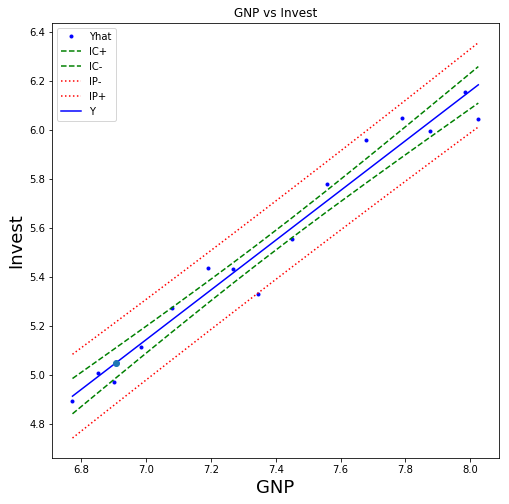

In [10]:
gnp = df["gnp"]
yhat = get_Y_hat(X, get_theta_hat(X, Y))
alpha = 0.1
ICs = np.matrix([get_IC_ystar(np.matrix([1, X_tild[i]]).T, X, Y, alpha) for i in range(0, n)])
IPs = np.matrix([get_IP_y(np.matrix([1, X_tild[i]]).T, X, Y, alpha) for i in range(0, n)])
invest_plus_IC = ICs[:, 0]
invest_minus_IC = ICs[:, 1]
#invest_minus_IC = [X_tild[i] - get_IC_ystar(np.matrix([1, X_tild[i]]).T, X, Y, alpha) for i in range(0, n)]
w = 8 # figure width
plt.figure(figsize=(w, w))
plt.plot(gnp, Y, color='blue', label='Yhat', marker='.', linestyle = 'None',)
plt.plot(gnp, invest_plus_IC, color='green', label='IC+', ls="--")
plt.plot(gnp, invest_minus_IC, color='green', label='IC-', ls="--")

plt.plot(gnp, IPs[:, 0], color='red', label='IP-', ls=":")
plt.plot(gnp, IPs[:, 1], color='red', label='IP+', ls=":")

plt.plot(gnp, yhat, color='blue', label='Y')

#plt.plot(gnp, invest_minus_IC, color='blue', label='Father')
plt.ylabel('Invest', fontsize=18)
plt.xlabel('GNP', fontsize=18)
plt.title("GNP vs Invest")

x = np.matrix([[1, np.log(1000)]]).T
ypred = get_ypred(x, X, Y)

plt.legend()
plt.plot(x[1], ypred, marker="o")
plt.show()